# A simple Perceptron in NumPy

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [156]:
#create data
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(-1,10),random_state=42)

In [157]:
y=(y*2-1) #scale true lables from [0,1] to [-1,1
print(y)

[-1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


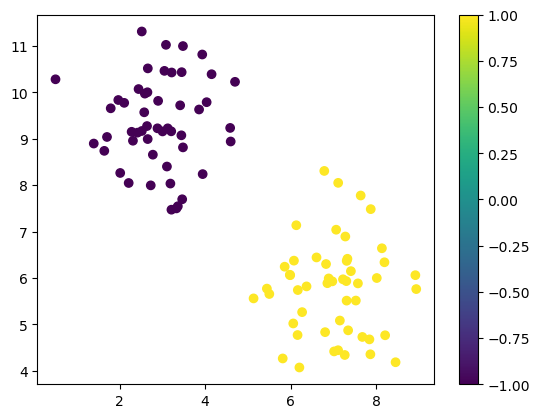

In [158]:
#plot data
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Parameterize the classifier hyper-plane
* find offset $b$ and normal vector $w$

In [160]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

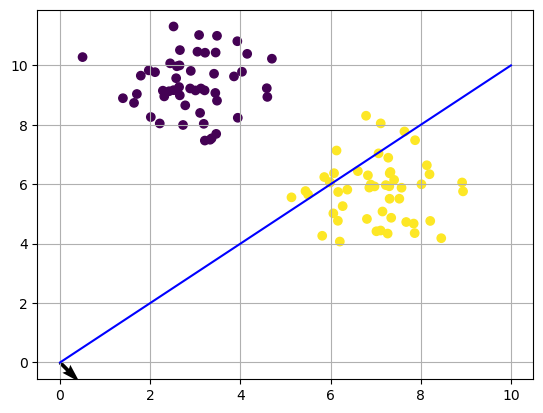

In [182]:
#part 1: find slope and intercept by using the visualization
w=np.array([1,-1])
b=0

#line1 = plot_line_from_normal_vector(w, b, color='blue',x_range=[0,10])
line1 = plot_line_from_normal_vector_and_offset(w, b, color='blue',x_range=[0,10])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b,w[0],w[1])
plt.grid()

### Classify samples via $sgn(wx+b)$

### classify single sample

In [173]:
#use first train sample
w.dot(X[1,:].T)+b

1.4959392248984278

In [174]:
#or
X[1,:].dot(w)+b

1.4959392248984278

In [175]:
# check for all train samples if sign(y)==sign(wx+b)
i=1
print (y[i],np.sign(w.dot(X[i,:].T)+b))
y[i]==np.sign(w.dot(X[i,:].T)+b)

1 1.0


True

### classify all samples at once
* change vector dot-product to vector matrix mult (matrix holds all samples)

In [176]:
w.dot(X.T)+b

array([-6.63143132,  1.49593922, -6.99322138,  0.39195721,  0.38700721,
       -7.51455702,  0.91619758, -0.15253637, -5.26650927, -6.86792121,
       -4.84563967,  1.55019594, -7.34995049, -7.86296335,  0.55441162,
        1.00549826, -0.93632187, -0.08667488,  2.66786905, -4.25858637,
        2.92652256,  0.97278173,  3.16710944,  2.01728524,  0.94474996,
       -5.52613798,  1.04843635, -6.88163027,  1.69164693, -1.51813597,
       -6.33793248, -7.09659385, -7.86460766, -4.64649099, -4.23125762,
       -0.1369085 ,  1.25455358, -6.98219776, -6.64465262, -4.16938234,
       -5.77081776,  3.51107157, -0.29507624,  2.01275657,  1.97503808,
       -4.3417518 , -7.93838576, -6.30285106, -6.24804441, -0.38116707,
        0.02615785, -7.50054637, -6.335604  ,  1.26369287, -4.18267355,
        2.94951494, -7.2094835 ,  1.79868634,  1.39298589, -5.33116028,
       -5.95186164,  0.52922675, -7.3809437 , -0.42556731,  3.44596793,
        0.42910749,  3.17829812, -7.33264148, -0.32542706,  1.37

In [177]:
np.sign(w.dot(X.T)+b)

array([-1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.])

In [178]:
#check result
y==np.sign(w.dot(X.T)+b)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [179]:
y==np.sign(X.dot(w.T)+b)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [180]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w.dot(X.T)+b))
print(pos)

(array([ 7, 16, 17, 29, 35, 42, 49, 63, 68, 78, 84]),)


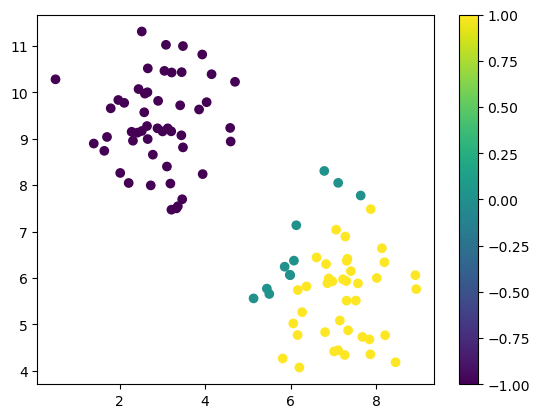

In [181]:
y_test=np.copy(y)
y_test[pos]=0
plt.scatter(X[:,0],X[:,1],c=y_test)#set color 
plt.colorbar()
#abline(1,2)